<a href="https://colab.research.google.com/github/Bunny1421/PhotoMosaic/blob/main/imageMosaic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

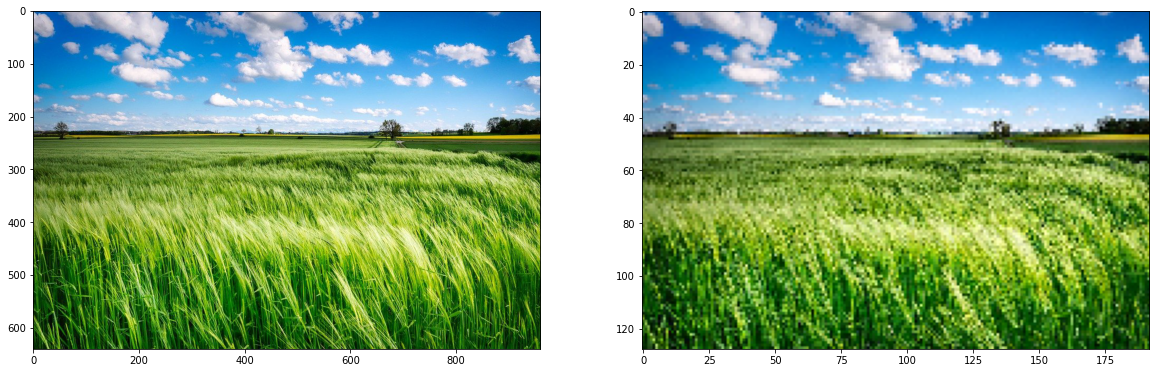

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread("img.jpg")
#อ่านภาพมาด้วยคำสั่ง plt.imread("ชื่อภาพ.นามสกุลไฟล์") มาเก็บในตัวแปร img
a = cv2.resize(img, dsize=None, fx=0.2, fy=0.2)
#resize img โดยกำหนดให้ fx และ fy เป็น 0.2
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(a)

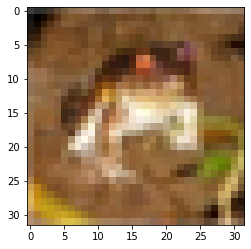

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
(xtrain,ytrain),(xtest,ytest) =keras.datasets.cifar10.load_data()

X = np.concatenate((xtrain,xtest),axis=0)

plt.imshow(X[0])

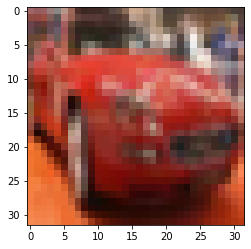

In [ ]:
plt.imshow(X[5])

In [ ]:
X.shape

(60000, 32, 32, 3)

In [ ]:
Color = []
for x in X:
Color.append(np.mean(x.reshape(32*32,3), axis=0))
#เช็ค reshape ให้รูปทุกรูปมีขนาด 32 x 32 หาค่าเฉลี่ยแล้ว Append เข้า Color
Color = np.array(Color)
Color[0]

In [ ]:
Color[5]

array([142.44042969,  70.78027344,  57.77832031])

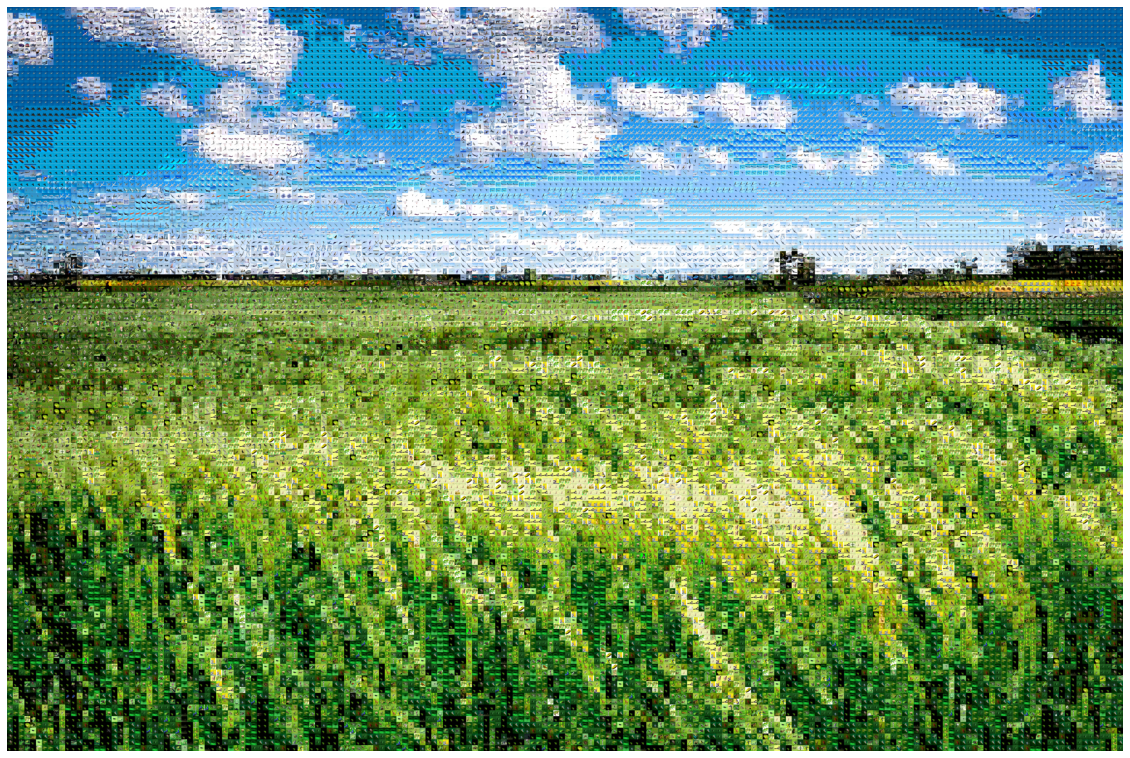

In [ ]:
img_out = np.zeros((a.shape[0]*32, a.shape[1]*32,3), dtype=np.uint8)
#สร้าง array
for i in range(a.shape[0]):
  for j in range(a.shape[1]):
    #loop เข้ามาในแต่ละ pixel
    bbb = np.sum(np.abs(Color-a[i][j]),axis=1)
    #หาผลรวมของค่าสัมบรูณ์ที่ สีในภาพเล็ก ลบ สีในภาพใหญ่
    #ถ้าลบกันเหลือน้อย แสดงว่า สีในรูปนั้นมันมีค่าใกล้เคียงกัน
    img_out[i*32:(i+1)*32, j*32:(j+1)*32] = X[bbb.argmin()]
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img_out)
plt.imsave('img_out.jpg', img_out)